In [ ]:
# Dataset from https://www.transtats.bts.gov/ONTIME/Departures.aspx
# Year: 2017, 2018, 2019, 2021, 2022, 2023
# Prediction Year: 2024
# Full-service carriers: Delta, United, American
# Low-cost carries: Southwest, Spirit, Frontier
# Airports: Dallas/Fort Worth International Airport, Denver International Airport, Los Angeles International Airport

In [ ]:
# We will start with scraping the full list of airport information and states from here: https://www.transtats.bts.gov/ONTIME/AirportInfo.html
# Import all necessary scraping libs
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
# URL of the page containing the airport data
url = "https://www.transtats.bts.gov/ONTIME/AirportInfo.html"

# Send a GET request to fetch the HTML content
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table containing airport information
# Based on inspection, the table seems to be a <table> element with rows containing airport data
table = soup.find('table')

# Extract all rows from the table
rows = table.find_all('tr')

# Lists to hold the extracted data
airport_codes = []
airport_names = []
cities = []
states = []

# Loop over each row and extract the necessary information
for row in rows[1:]:  # Skip the header row
    cols = row.find_all('td')

    airport_code = cols[0].get_text(strip=True)
    airport_info = cols[1].get_text(strip=True).split(',')
    airport_name = airport_info[0].strip()
    city = airport_info[1].strip()
    state = airport_info[-1].strip()

    # Append the data to respective lists
    airport_codes.append(airport_code)
    airport_names.append(airport_name)
    cities.append(city)
    states.append(state)

# Create a DataFrame to store the scraped data
airports_df = pd.DataFrame({
    "Airport Code": airport_codes,
    "Airport Name": airport_names,
    "City": cities,
    "State": states
})

# Display the DataFrame
airports_df

,Airport Code,Airport Name,City,State
0,ABE,Lehigh Valley International,Allentown,PA
1,ABI,Abilene Regional,Abilene,TX
2,ABQ,Albuquerque International,Albuquerque,NM
3,ACK,Nantucket Memorial,Nantucket,MA
4,ADQ,Kodiak,Kodiak,AK
...,...,...,...,...
220,TWF,Joslin Field-Magic Valley Regional,Twin Falls,ID
221,TYS,McGhee Tyson,Knoxville,TN
222,VPS,Eglin Air Force Base,Valparaiso,FL
223,WRG,Wrangell,Wrangell,AK


In [ ]:
# List all unique states in this DataFrame
airports_df['State'].unique()

array(['PA', 'TX', 'NM', 'MA', 'AK', 'GA', 'NY', 'IA', 'WI', 'NC', 'MI',
       'CT', 'CA', 'ME', 'AL', 'MT', 'ND', 'TN', 'ID', 'PR', 'LA', 'VT',
       'MD', 'SC', 'OH', 'CO', 'WV', 'FL', 'DC', 'MN', 'OR', 'IN', 'NJ',
       'SD', 'WA', 'MS', 'Guam', 'HI', 'KS', 'WY', 'NV', 'KY', 'AR', 'NE',
       'MO', 'IL', 'NH', 'OK', 'VA', 'AZ', 'RI', 'UT', 'Mariana Islands',
       'VI'], dtype=object)

In [ ]:
# Ignore certain 'states' that are not applicable to our analysis
# Remove rows with these states 'Guam', 'Mariana Islands'
airports_df = airports_df[airports_df['State'] != 'Guam']
airports_df = airports_df[airports_df['State'] != 'Mariana Islands']
airports_df

,Airport Code,Airport Name,City,State
0,ABE,Lehigh Valley International,Allentown,PA
1,ABI,Abilene Regional,Abilene,TX
2,ABQ,Albuquerque International,Albuquerque,NM
3,ACK,Nantucket Memorial,Nantucket,MA
4,ADQ,Kodiak,Kodiak,AK
...,...,...,...,...
220,TWF,Joslin Field-Magic Valley Regional,Twin Falls,ID
221,TYS,McGhee Tyson,Knoxville,TN
222,VPS,Eglin Air Force Base,Valparaiso,FL
223,WRG,Wrangell,Wrangell,AK


In [ ]:
# Correct data whose airport's state is 'DC'
# Find rows whose state is 'DC'
airports_df[airports_df['State'] == 'DC']

,Airport Code,Airport Name,City,State
55,DCA,Ronald Reagan Washington National,Washington,DC
101,IAD,Washington Dulles International,Washington,DC


In [ ]:
# Fix the rows whose state value is 'DC' to 'VA'
airports_df.loc[airports_df['State'] == 'DC', 'State'] = 'VA'
airports_df[airports_df['State'] == 'VA']

,Airport Code,Airport Name,City,State
55,DCA,Ronald Reagan Washington National,Washington,VA
101,IAD,Washington Dulles International,Washington,VA
164,ORF,Norfolk International,Norfolk/Virginia Beach,VA
169,PHF,Newport News/Williamsburg International,Newport News,VA
182,RIC,Richmond International,Richmond,VA
184,ROA,Roanoke Regional,Roanoke,VA


In [ ]:
# List all the unique airport codes
airports_df['Airport Code'].unique()

array(['ABE', 'ABI', 'ABQ', 'ACK', 'ADQ', 'AGS', 'AKN', 'ALB', 'ALO',
       'AMA', 'ANC', 'ANI', 'ATL', 'ATW', 'AUS', 'AVL', 'AVP', 'AZO',
       'BDL', 'BET', 'BFL', 'BGM', 'BGR', 'BHM', 'BIL', 'BIS', 'BNA',
       'BOI', 'BOS', 'BQN', 'BRO', 'BRW', 'BTR', 'BTV', 'BUF', 'BUR',
       'BWI', 'BZN', 'CAE', 'CAK', 'CDV', 'CHA', 'CHS', 'CID', 'CLE',
       'CLT', 'CMH', 'COS', 'CRP', 'CRW', 'CSG', 'CVG', 'DAB', 'DAL',
       'DAY', 'DCA', 'DEN', 'DFW', 'DLG', 'DLH', 'DRO', 'DSM', 'DTW',
       'DUT', 'EGE', 'ELM', 'ELP', 'ERI', 'EUG', 'EVV', 'EWR', 'FAI',
       'FAR', 'FAT', 'FAY', 'FCA', 'FLL', 'FNT', 'FSD', 'FWA', 'GEG',
       'GFK', 'GNV', 'GPT', 'GRB', 'GRR', 'GSO', 'GSP', 'GST', 'GTF',
       'GUC', 'HDN', 'HLN', 'HNL', 'HOU', 'HPN', 'HRL', 'HSV', 'HTS',
       'HVN', 'IAD', 'IAH', 'ICT', 'IDA', 'ILM', 'IND', 'ISP', 'ITH',
       'ITO', 'JAC', 'JAN', 'JAX', 'JFK', 'JNU', 'KOA', 'KSM', 'KTN',
       'LAN', 'LAS', 'LAX', 'LBB', 'LEX', 'LFT', 'LGA', 'LGB', 'LIH',
       'LIT', 'LNK',

In [ ]:
# Next, we will use the dataset T-100 Domestic Market and Segment Data.
# https://equity-data.dot.gov/datasets/17e9a793c7cf47c8b64dab92da55dfe5/about
#
# This dataset is a combination of both T-100 Market and T-100 Segments
# datasets, and shows 2023 statistics for all domestic airports operated by
# US carriers for domestic travel. All information are totals for the year by origin airport.
# The T-100 Domestic Market and Segment Data dataset was downloaded on
# June 06, 2024 from the Bureau of Transportation Statistics (BTS) and is
# part of the U.S. Department of Transportation (USDOT)/Bureau of Transportation Statistics (BTS) National Transportation Atlas Database (NTAD).
# The database includes data obtained from a 100 percent census of BTS Form 41 schedule submissions by large certificated air carriers.
# It shows 2023 statistics for all domestic airports operated by US carriers, and all information are totals for the year.
# This dataset is a combination of both T-100 Market and T-100 Segments datasets.
# The T-100 Market includes enplanement data, and T-100 Segment data includes arrivals, departures, freight, and mail.
# Data is by origin airport.

In [ ]:
# Load the csv file from Google Drive
from google.colab import drive


drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# Read the csv file from the mounted path
file_path = "/content/gdrive/MyDrive/Colab Notebooks/T100_Domestic_Market_and_Segment_Data_-3591723781169319541.csv"
t100_df = pd.read_csv(file_path)
t100_df.sample(10)

,OBJECTID,year,origin,enplanements,passengers,departures,arrivals,freight,mail
911,912,2023,CGF,19,19,6,9.0,0,0
578,579,2023,FTW,1630,1630,55,56.0,3842,0
481,482,2023,BKC,3615,4448,1361,1360.0,15816,6306
388,389,2023,EKO,10715,10715,367,368.0,0,0
299,300,2023,BLD,29261,29261,3146,2334.0,2219,0
79,80,2023,MYR,1658944,1668710,15149,15188.0,801404,0
587,588,2023,KNK,1545,1545,540,539.0,61561,2083
642,643,2023,RMP,554,770,339,336.0,5022,543
728,729,2023,DVT,139,139,34,32.0,0,0
1065,1066,2023,PGS,5,5,1,NaN,0,0


In [ ]:
# The dataset contains the following key columns relevant to the airports:
#
# origin: The origin airport code.
# enplanements: The number of passengers boarding flights at the origin airport (this reflects the volume of passengers).
# passengers: Total passengers, including those arriving and departing at the airport.
# departures: Number of flight departures from the origin airport.
# arrivals: Number of flight arrivals at the origin airport.
# freight and mail: Amount of freight and mail handled at the airport.

In [ ]:
# Merge the columns 'enplanements', 'passengers', 'departures', 'arrivals' to the airports_df by origin
df = pd.merge(airports_df, t100_df[['origin', 'enplanements', 'passengers', 'departures', 'arrivals']], left_on='Airport Code', right_on='origin', how='left')
df.rename(columns={'enplanements': 'Enplanements (2023)', 'passengers': 'Passengers (2023)', 'departures': 'Departures (2023)', 'arrivals': 'Arrivals (2023)'}, inplace=True)
df.drop(columns=['origin'], inplace=True)
df.sample(10)

,Airport Code,Airport Name,City,State,Enplanements (2023),Passengers (2023),Departures (2023),Arrivals (2023)
30,BRO,Brownsville/South Padre Island International,Brownsville,TX,176047.0,176158.0,3108.0,3110.0
53,DAL,Dallas Love Field,Dallas/Ft. Worth,TX,8552790.0,8876445.0,78580.0,78500.0
189,SAV,Savannah International,Savannah,GA,1907440.0,1923270.0,20072.0,20088.0
8,ALO,Waterloo Municipal,Waterloo,IA,12814.0,13099.0,635.0,638.0
42,CHS,Charleston Air Force Base/International,Charleston,SC,3031368.0,3048762.0,29332.0,29982.0
209,SWF,Stewart International,Newburgh,NY,77283.0,78204.0,1263.0,1428.0
196,SGF,Springfield-Branson Regional,Springfield,MO,632448.0,634090.0,10008.0,10015.0
219,TYS,McGhee Tyson,Knoxville,TN,1382073.0,1391559.0,17876.0,17880.0
64,EGE,Eagle County Regional,Eagle,CO,226791.0,226791.0,3014.0,3015.0
137,MFE,McAllen Miller International,Mission/Mcallen,TX,511551.0,512119.0,4830.0,4842.0


In [ ]:
# Sort df by Enplanements (2023) column
df.sort_values(by='Enplanements (2023)', ascending=False, inplace=True)
df

,Airport Code,Airport Name,City,State,Enplanements (2023),Passengers (2023),Departures (2023),Arrivals (2023)
12,ATL,Hartsfield International,Atlanta,GA,44721151.0,44940145.0,340757.0,340435.0
56,DEN,Denver International,Denver,CO,35892655.0,36089755.0,307789.0,307873.0
57,DFW,Dallas/Ft.Worth International,Dallas/Ft. Worth,TX,33853033.0,33892107.0,297097.0,297129.0
162,ORD,Chicago O'Hare International,Chicago,IL,29305603.0,29379846.0,303030.0,302931.0
118,LAS,McCarran International,Las Vegas,NV,26216256.0,26443518.0,202540.0,202475.0
...,...,...,...,...,...,...,...,...
88,GST,Gustavus,Gustavus,AK,9580.0,9596.0,1231.0,1233.0
129,LWB,Greenbrier Valley,Lewisburg,WV,8290.0,8290.0,600.0,601.0
115,KSM,St Mary's Airport,St. Mary's,AK,4911.0,6713.0,2974.0,2902.0
11,ANI,Aniak,Aniak,AK,4624.0,5221.0,3098.0,3093.0


In [ ]:
# Check to see if any NaN values after merged in df
df[df.isnull().T.any()]

,Airport Code,Airport Name,City,State,Enplanements (2023),Passengers (2023),Departures (2023),Arrivals (2023)
167,PFN,Panama City-Bay County International,Panama City,FL,NaN,NaN,NaN,NaN


In [ ]:
# Find rows with State == 'DC'
df[df['State'] == 'DC']

,Airport Code,Airport Name,City,State,Enplanements (2023),Passengers (2023),Departures (2023),Arrivals (2023)


In [ ]:
# Merge rows that have the same state
state_df = df.groupby('State').sum()

# Drop 'Airport Code', 'Airport Name', and 'City'
state_df.drop(columns=['Airport Code', 'Airport Name', 'City'], inplace=True)

# Sort df by Enplanements (2023) column
state_df.sort_values(by='Enplanements (2023)', ascending=False, inplace=True)

# Convert all values to int
state_df = state_df.astype(int)

state_df

,Enplanements (2023),Passengers (2023),Departures (2023),Arrivals (2023)
State,,,,
CA,89311139,90243680,798487,798845
TX,85905158,87052800,803194,803834
FL,81405178,81854359,617784,618595
GA,46974560,47220667,367260,366924
IL,40181040,40510957,396142,396009
CO,38021360,38281742,334993,335284
NY,38012342,38063433,401592,402467
NC,33694782,33795590,336575,336473
NV,28432014,28671231,226041,225785


In [ ]:
# Next we will incorporate GDP by state dataset from https://www.bea.gov/sites/default/files/2024-06/stgdppi1q24.xlsx
# GDP by state dataset
# The dataset has been converted into multiple csv files for easier processing
# Read the first csv file containing the state GDP from GDP.csv
gdp_df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/GDP.csv')

# Convert all GDP columns to int
gdp_df['GDP (2023)'] = gdp_df['GDP (2023)'].str.replace(',', '').astype(int)
gdp_df['GDP (2022)'] = gdp_df['GDP (2022)'].str.replace(',', '').astype(int)

# Let's calculate the percentage change from 2022 in 2023 into a new column called 'Percentage Change'
gdp_df['GDP Percentage Change (2023)'] = (gdp_df['GDP (2023)'] - gdp_df['GDP (2022)']) / gdp_df['GDP (2022)'] * 100

# We will only focus on GDP (2023) and Percentage columns
gdp_df = gdp_df[['State', 'GDP (2023)', 'GDP Percentage Change (2023)']]
gdp_df

,State,GDP (2023),GDP Percentage Change (2023)
0,Connecticut,340181,6.524605
1,Maine,91081,6.153774
2,Massachusetts,733860,6.131799
3,New Hampshire,111102,5.786241
4,Rhode Island,77322,6.253865
5,Vermont,43130,5.630526
6,Delaware,93595,3.754656
7,District of Columbia,174796,5.897820
8,Maryland,512280,6.699881
9,New Jersey,799305,5.875504


In [ ]:
# Generate a list of state codes in a new column from the corresponding `State` column
# Use the us module
!pip install us
import us


def get_state_abbreviation(state_name):
    state = us.states.lookup(state_name)
    return state.abbr if state else None

In [ ]:
gdp_df['State Code'] = gdp_df['State'].apply(get_state_abbreviation)

# Sort the gdp_df by 'State'
gdp_df.sort_values(by='State', inplace=True)
gdp_df

,State,GDP (2023),GDP Percentage Change (2023),State Code
24,Alabama,300152,6.599803,AL
45,Alaska,67337,2.493189,AK
36,Arizona,508344,6.872643,AZ
25,Arkansas,176240,6.175710,AR
46,California,3862171,6.055728,CA
40,Colorado,520389,5.923194,CO
0,Connecticut,340181,6.524605,CT
6,Delaware,93595,3.754656,DE
7,District of Columbia,174796,5.897820,None
26,Florida,1579503,9.758975,FL


In [ ]:
# Find rows in gdp_df whose State is None
gdp_df[gdp_df['State Code'].isnull()]

,State,GDP (2023),GDP Percentage Change (2023),State Code
7,District of Columbia,174796,5.897820,None
51,Overseas activity,149584,2.109998,None


In [ ]:
# Fix the State to have the correct values
gdp_df.loc[gdp_df['State'] == 'District of Columbia', 'State Code'] = 'DC'
gdp_df.loc[gdp_df['State'] == 'Puerto Rico', 'State Code'] = 'PR'
gdp_df.loc[gdp_df['State'] == 'Virgin Islands', 'State Code'] = 'VI'

# Remove 'Overseas activity' state
gdp_df = gdp_df[gdp_df['State'] != 'Overseas activity']

# Drop the 'State' column
gdp_df.drop(columns=['State'], inplace=True)

# Rename the 'State Code' column to 'State
gdp_df.rename(columns={'State Code': 'State'}, inplace=True)
gdp_df

<ipython-input-22-d2c4eba2ba73>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_df.drop(columns=['State'], inplace=True)
<ipython-input-22-d2c4eba2ba73>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_df.rename(columns={'State Code': 'State'}, inplace=True)


,GDP (2023),GDP Percentage Change (2023),State
24,300152,6.599803,AL
45,67337,2.493189,AK
36,508344,6.872643,AZ
25,176240,6.175710,AR
46,3862171,6.055728,CA
40,520389,5.923194,CO
0,340181,6.524605,CT
6,93595,3.754656,DE
7,174796,5.897820,DC
26,1579503,9.758975,FL


In [ ]:
# Merge these two columns back to df on the column 'State'
state_airport_gdp_df = pd.merge(state_df, gdp_df, left_on='State', right_on='State', how='left')

In [ ]:
# Check to see if any NaN values after merged
state_airport_gdp_df[state_airport_gdp_df.isnull().T.any()]

,State,Enplanements (2023),Passengers (2023),Departures (2023),Arrivals (2023),GDP (2023),GDP Percentage Change (2023)
26,PR,5781838,5794992,49613,48779,NaN,NaN
45,VI,936764,936943,22729,23552,NaN,NaN


In [ ]:
# Drop these rows
state_airport_gdp_df.dropna(inplace=True)
state_airport_gdp_df

,State,Enplanements (2023),Passengers (2023),Departures (2023),Arrivals (2023),GDP (2023),GDP Percentage Change (2023)
0,CA,89311139,90243680,798487,798845,3862171.0,6.055728
1,TX,85905158,87052800,803194,803834,2563508.0,6.717810
2,FL,81405178,81854359,617784,618595,1579503.0,9.758975
3,GA,46974560,47220667,367260,366924,805397.0,4.954403
4,IL,40181040,40510957,396142,396009,1082968.0,5.586706
5,CO,38021360,38281742,334993,335284,520389.0,5.923194
6,NY,38012342,38063433,401592,402467,2152262.0,5.070243
7,NC,33694782,33795590,336575,336473,766919.0,7.116380
8,NV,28432014,28671231,226041,225785,239398.0,7.382737
9,VA,24827669,24936417,281958,282637,707085.0,6.632273


In [ ]:
# Convert 'GDP (2023)' column to int
state_airport_gdp_df['GDP (2023)'] = state_airport_gdp_df['GDP (2023)'].astype(int)

# Rename the GDP column to 'GDP (2023, millions)
state_airport_gdp_df.rename(columns={'GDP (2023)': 'GDP (2023, millions)'}, inplace=True)

state_airport_gdp_df

,State,Enplanements (2023),Passengers (2023),Departures (2023),Arrivals (2023),"GDP (2023, millions)",GDP Percentage Change (2023)
0,CA,89311139,90243680,798487,798845,3862171,6.055728
1,TX,85905158,87052800,803194,803834,2563508,6.717810
2,FL,81405178,81854359,617784,618595,1579503,9.758975
3,GA,46974560,47220667,367260,366924,805397,4.954403
4,IL,40181040,40510957,396142,396009,1082968,5.586706
5,CO,38021360,38281742,334993,335284,520389,5.923194
6,NY,38012342,38063433,401592,402467,2152262,5.070243
7,NC,33694782,33795590,336575,336473,766919,7.116380
8,NV,28432014,28671231,226041,225785,239398,7.382737
9,VA,24827669,24936417,281958,282637,707085,6.632273


In [ ]:
# Next we will retrieve the median household income data by state from https://fred.stlouisfed.org/release/tables?rid=249&eid=259462&od=#
# URL of the FRED page containing the median household income by state
url = 'https://fred.stlouisfed.org/release/tables?rid=249&eid=259462#snid=259463'

# Send a GET request to fetch the HTML content of the page
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table with the relevant data (you may need to inspect the HTML structure for the correct tags)
table = soup.find('table')

# Extract all rows from the table
rows = table.find_all('tr')

# Create lists to hold the extracted data
states = []
income_values = []

# Loop through each row and extract the state name and income value
for row in rows[1:]:  # Skipping the header row
    cols = row.find_all('td')
    state = row.find_all('span')[0].get_text(strip=True)

    if len(cols) >= 2:
        income_value = cols[1].get_text(strip=True)

        # Clean the income value (remove commas and convert to integer)
        income_value = int(income_value.replace(',', ''))

        # Append the data to the respective lists
        states.append(state)
        income_values.append(income_value)

# Create a DataFrame from the scraped data
income_df = pd.DataFrame({
    'State': states,
    'Median Household Income (2023)': income_values
})

# Remove the row with 'The United States'
income_df = income_df[income_df['State'] != 'The United States']

# Display the scraped data
income_df.head()

,State,Median Household Income (2023)
1,Alabama,60660
2,Alaska,98190
3,Arizona,82660
4,Arkansas,63250
5,California,89870


In [ ]:
# Replace the state with the state code
income_df['State Code'] = income_df['State'].apply(get_state_abbreviation)

# Drop the state column
income_df.drop(columns=['State'], inplace=True)

# Rename the 'State Code' column to 'State
income_df.rename(columns={'State Code': 'State'}, inplace=True)

# Drop all na rows
income_df.dropna(inplace=True)

income_df.sort_values(by='Median Household Income (2023)', ascending=False, inplace=True)
income_df

,Median Household Income (2023),State
22,106500,MA
21,102000,MD
45,101200,UT
30,98780,NH
2,98190,AK
12,97360,HI
6,96640,CO
47,96490,VA
48,93440,WA
7,92240,CT


In [ ]:
# Merge these two columns back to df on the column 'State'
state_income_merged_df = pd.merge(state_airport_gdp_df, income_df, left_on='State', right_on='State', how='left')
state_income_merged_df

,State,Enplanements (2023),Passengers (2023),Departures (2023),Arrivals (2023),"GDP (2023, millions)",GDP Percentage Change (2023),Median Household Income (2023)
0,CA,89311139,90243680,798487,798845,3862171,6.055728,89870
1,TX,85905158,87052800,803194,803834,2563508,6.717810,79060
2,FL,81405178,81854359,617784,618595,1579503,9.758975,72200
3,GA,46974560,47220667,367260,366924,805397,4.954403,72420
4,IL,40181040,40510957,396142,396009,1082968,5.586706,87820
5,CO,38021360,38281742,334993,335284,520389,5.923194,96640
6,NY,38012342,38063433,401592,402467,2152262,5.070243,81600
7,NC,33694782,33795590,336575,336473,766919,7.116380,68610
8,NV,28432014,28671231,226041,225785,239398,7.382737,81310
9,VA,24827669,24936417,281958,282637,707085,6.632273,96490


In [ ]:
# Check if there is any missing rows
state_income_merged_df[state_income_merged_df.isnull().T.any()]

,State,Enplanements (2023),Passengers (2023),Departures (2023),Arrivals (2023),"GDP (2023, millions)",GDP Percentage Change (2023),Median Household Income (2023)


In [ ]:
# Retrieve the unemployment rate in 2023 by state from https://fred.stlouisfed.org/release/tables?eid=840687&rid=116
url = 'https://fred.stlouisfed.org/release/tables?eid=840687&rid=116'

# Send a GET request to fetch the HTML content of the page
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
#try response.text

# Find the table with the relevant data (you may need to inspect the HTML structure for the correct tags)
table = soup.find('table')

# Extract all rows from the table
rows = table.find_all('tr')

# Create lists to hold the extracted data
states = []
unemployment_values = []

# Loop through each row and extract the state name and income value
for row in rows[1:]:  # Skipping the header row
    cols = row.find_all('td')
    state = row.find_all('span')[0].get_text(strip=True)

    if len(cols) >= 2:
        unemployment_value = cols[1].get_text(strip=True)

        # Clean the income value (remove commas and convert to integer)
        unemployment_value = float(unemployment_value.replace(',', ''))

        # Append the data to the respective lists
        states.append(state)
        unemployment_values.append(unemployment_value)

# Create a DataFrame from the scraped data
unemployment_df = pd.DataFrame({
    'State': states,
    'Unemployment Rate (2023)': unemployment_values
})

# Remove the row with 'The United States'
unemployment_df = unemployment_df[unemployment_df['State'] != 'The United States']

# Display the scraped data
unemployment_df.head()

,State,Unemployment Rate (2023)
0,Alabama,2.5
1,Alaska,4.2
2,Arizona,3.9
3,Arkansas,3.3
4,California,4.8


In [1]:
# import requests
# from bs4 import BeautifulSoup

# # URL of the FRED page
# url = 'https://fred.stlouisfed.org/release/tables?rid=249&eid=259462#snid=259463'

# # Send a GET request
# response = requests.get(url)
# soup = BeautifulSoup(response.content, 'html.parser')

# # Find the table
# table = soup.find('table', id='release-elements-tree')

# # Extract the rows from the tbody only (skipping thead)
# tbody = table.find('tbody')
# rows = tbody.find_all('tr')  # Get all data rows

# # Lists to store the data
# states = []
# incomes = []

# # Iterate through each row
# for row in rows:
#     cols = row.find_all('td')
#     if len(cols) > 1:  # Ensure there are enough columns
#         state = cols[1].get_text(strip=True)  # Adjust based on the column index
#         income = cols[2].get_text(strip=True)
#         states.append(state)
#         incomes.append(income)

# # Output the data (you can convert it to a DataFrame or save it)
# for state, income in zip(states, incomes):
#     print(f"{state}: {income}")


In [2]:
# state = row.find('span', class_='fred-rls-elm-nm').get_text(strip=True)

In [ ]:
# Replace the state with the state code
unemployment_df['State Code'] = unemployment_df['State'].apply(get_state_abbreviation)

# Drop the state column
unemployment_df.drop(columns=['State'], inplace=True)

# Rename the 'State Code' column to 'State
unemployment_df.rename(columns={'State Code': 'State'}, inplace=True)

# Drop all na rows
unemployment_df.dropna(inplace=True)

unemployment_df.sort_values(by='Unemployment Rate (2023)', ascending=False, inplace=True)
unemployment_df

,Unemployment Rate (2023),State
28,5.1,NV
4,4.8,CA
13,4.5,IL
30,4.4,NJ
1,4.2,AK
17,4.2,KY
32,4.2,NY
47,4.1,WA
7,4.0,DE
48,3.9,WV


In [ ]:
# Merge these two columns back to df on the column 'State'
state_unemployment_merged_df = pd.merge(state_income_merged_df, unemployment_df, left_on='State', right_on='State', how='left')
state_unemployment_merged_df

,State,Enplanements (2023),Passengers (2023),Departures (2023),Arrivals (2023),"GDP (2023, millions)",GDP Percentage Change (2023),Median Household Income (2023),Unemployment Rate (2023)
0,CA,89311139,90243680,798487,798845,3862171,6.055728,89870,4.8
1,TX,85905158,87052800,803194,803834,2563508,6.717810,79060,3.9
2,FL,81405178,81854359,617784,618595,1579503,9.758975,72200,2.9
3,GA,46974560,47220667,367260,366924,805397,4.954403,72420,3.2
4,IL,40181040,40510957,396142,396009,1082968,5.586706,87820,4.5
5,CO,38021360,38281742,334993,335284,520389,5.923194,96640,3.2
6,NY,38012342,38063433,401592,402467,2152262,5.070243,81600,4.2
7,NC,33694782,33795590,336575,336473,766919,7.116380,68610,3.5
8,NV,28432014,28671231,226041,225785,239398,7.382737,81310,5.1
9,VA,24827669,24936417,281958,282637,707085,6.632273,96490,2.9


In [ ]:
# Check if there is any missing rows
state_unemployment_merged_df[state_unemployment_merged_df.isnull().T.any()]

,State,Enplanements (2023),Passengers (2023),Departures (2023),Arrivals (2023),"GDP (2023, millions)",GDP Percentage Change (2023),Median Household Income (2023),Unemployment Rate (2023)


<Axes: xlabel='GDP (2023, millions)', ylabel='Departures (2023)'>

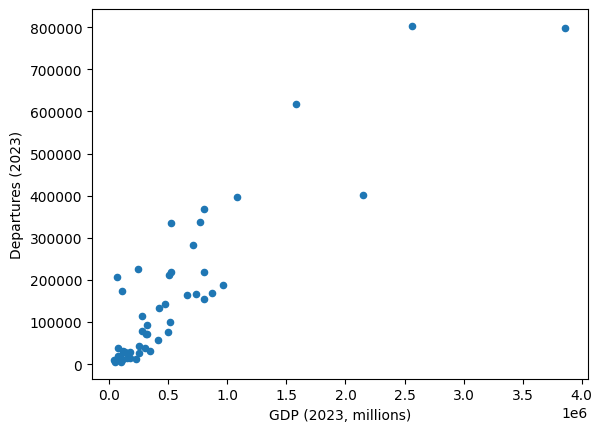

In [ ]:
# Show plot for Departures (2023) vs GDP (2023, millions) for state_unemployment_merged_df
# There seems to be a plausible correlation between GDP of a state and the number of departures
state_unemployment_merged_df.plot(x='GDP (2023, millions)', y='Departures (2023)', kind='scatter')

In [ ]:
# Retrieve the population in 2023 by state from https://fred.stlouisfed.org/release/tables?eid=259194&rid=118
url = 'https://fred.stlouisfed.org/release/tables?eid=259194&rid=118'

# Send a GET request to fetch the HTML content of the page
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table with the relevant data (you may need to inspect the HTML structure for the correct tags)
table = soup.find('table')

# Extract all rows from the table
rows = table.find_all('tr')

# Create lists to hold the extracted data
states = []
population_values = []

# Loop through each row and extract the state name and income value
for row in rows[1:]:  # Skipping the header row
    cols = row.find_all('td')
    state = row.find_all('span')[0].get_text(strip=True)

    if len(cols) >= 2:
        population_value = cols[1].get_text(strip=True)

        # Clean the income value (remove commas and convert to integer)
        population_value = int(float(population_value.replace(',', '')) * 1000)

        # Append the data to the respective lists
        states.append(state)
        population_values.append(population_value)

# Create a DataFrame from the scraped data
population_df = pd.DataFrame({
    'State': states,
    'Population (2023)': population_values
})

# Remove the row with 'The United States'
population_df = population_df[population_df['State'] != 'The United States']

# Display the scraped data
population_df.head()

,State,Population (2023)
0,Alabama,5108468
1,Alaska,733406
2,Arizona,7431344
3,Arkansas,3067732
4,California,38965193


In [ ]:
# Replace the state with the state code
population_df['State Code'] = population_df['State'].apply(get_state_abbreviation)

# Drop the state column
population_df.drop(columns=['State'], inplace=True)

# Rename the 'State Code' column to 'State
population_df.rename(columns={'State Code': 'State'}, inplace=True)

# Drop all na rows
population_df.dropna(inplace=True)

population_df.sort_values(by='Population (2023)', ascending=False, inplace=True)
population_df.head()

,Population (2023),State
4,38965193,CA
43,30503301,TX
9,22610726,FL
32,19571216,NY
38,12961683,PA


In [ ]:
# Merge these two columns back to df on the column 'State'
state_population_merged_df = pd.merge(state_unemployment_merged_df, population_df, left_on='State', right_on='State', how='left')
state_population_merged_df

,State,Enplanements (2023),Passengers (2023),Departures (2023),Arrivals (2023),"GDP (2023, millions)",GDP Percentage Change (2023),Median Household Income (2023),Unemployment Rate (2023),Population (2023)
0,CA,89311139,90243680,798487,798845,3862171,6.055728,89870,4.8,38965193
1,TX,85905158,87052800,803194,803834,2563508,6.717810,79060,3.9,30503301
2,FL,81405178,81854359,617784,618595,1579503,9.758975,72200,2.9,22610726
3,GA,46974560,47220667,367260,366924,805397,4.954403,72420,3.2,11029227
4,IL,40181040,40510957,396142,396009,1082968,5.586706,87820,4.5,12549689
5,CO,38021360,38281742,334993,335284,520389,5.923194,96640,3.2,5877610
6,NY,38012342,38063433,401592,402467,2152262,5.070243,81600,4.2,19571216
7,NC,33694782,33795590,336575,336473,766919,7.116380,68610,3.5,10835491
8,NV,28432014,28671231,226041,225785,239398,7.382737,81310,5.1,3194176
9,VA,24827669,24936417,281958,282637,707085,6.632273,96490,2.9,8715698


<Axes: xlabel='Population (2023)', ylabel='GDP (2023, millions)'>

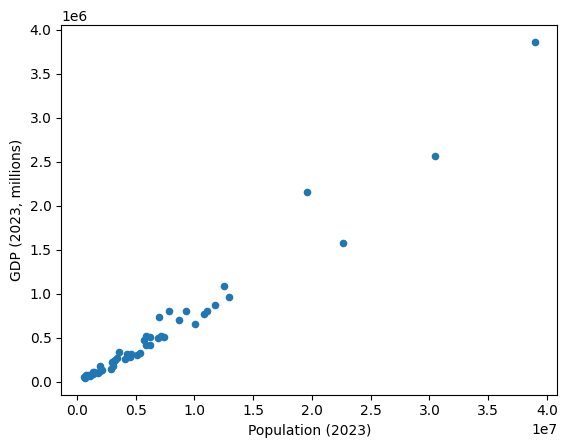

In [ ]:
# Show plot for Population (2023) vs GDP (2023, millions) for state_unemployment_merged_df
state_population_merged_df.plot(x='Population (2023)', y='GDP (2023, millions)', kind='scatter')

<Axes: xlabel='Population (2023)', ylabel='Enplanements (2023)'>

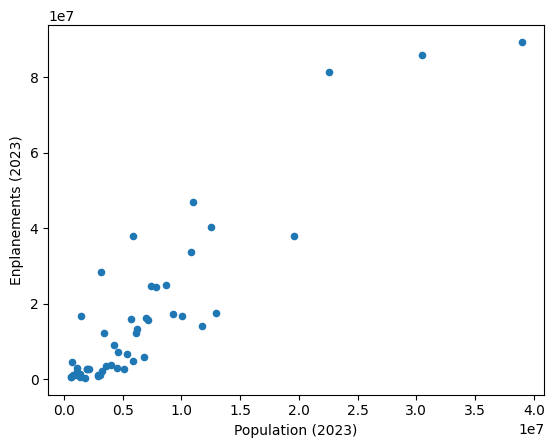

In [ ]:
state_population_merged_df.plot(x='Population (2023)', y='Enplanements (2023)', kind='scatter')

In [ ]:
# Calculate GDP Capita (2023) by dividing GDP (2023, millions) by Population (2023) into a new column
state_population_merged_df['GDP Per Capita (2023)'] = (state_population_merged_df['GDP (2023, millions)'] / state_population_merged_df['Population (2023)']) * 1_000_000

# Sort by GDP Capita
state_population_merged_df.sort_values(by='GDP Per Capita (2023)', ascending=False, inplace=True)
state_population_merged_df

,State,Enplanements (2023),Passengers (2023),Departures (2023),Arrivals (2023),"GDP (2023, millions)",GDP Percentage Change (2023),Median Household Income (2023),Unemployment Rate (2023),Population (2023),GDP Per Capita (2023)
6,NY,38012342,38063433,401592,402467,2152262,5.070243,81600,4.2,19571216,109970.785668
16,MA,16246019,16258401,167349,168020,733860,6.131799,106500,3.4,7001399,104816.194592
11,WA,24254909,24270783,217983,219064,801515,8.591507,93440,4.1,7812880,102588.930074
0,CA,89311139,90243680,798487,798845,3862171,6.055728,89870,4.8,38965193,99118.487620
41,ND,1019178,1022135,17383,17326,74113,2.012360,76960,1.9,783926,94540.811250
30,CT,3559797,3568739,32275,32344,340181,6.524605,92240,3.8,3617176,94046.018220
28,AK,4436050,4786536,207015,202319,67337,2.493189,98190,4.2,733406,91814.083877
36,NE,2595957,2630110,28770,28689,178421,8.177210,89190,2.3,1978379,90185.449805
5,CO,38021360,38281742,334993,335284,520389,5.923194,96640,3.2,5877610,88537.517801
4,IL,40181040,40510957,396142,396009,1082968,5.586706,87820,4.5,12549689,86294.409367


<Axes: xlabel='GDP Per Capita (2023)', ylabel='Enplanements (2023)'>

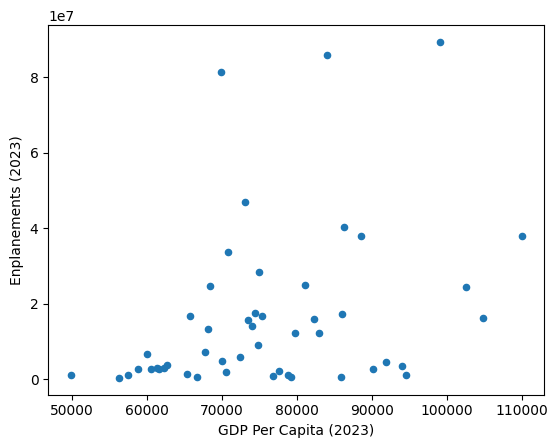

In [ ]:
state_population_merged_df.plot(x='GDP Per Capita (2023)', y='Enplanements (2023)', kind='scatter')

<Axes: xlabel='Median Household Income (2023)', ylabel='Enplanements (2023)'>

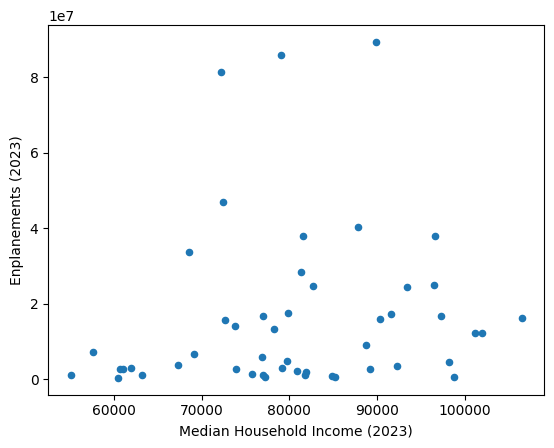

In [ ]:
# Plot the median household income vs enplanements
state_population_merged_df.plot(x='Median Household Income (2023)', y='Enplanements (2023)', kind='scatter')

In [ ]:
# Perform feature engineering
# Normalize
from sklearn.preprocessing import StandardScaler

df = state_population_merged_df.copy()

# Select features to normalize
features = df.select_dtypes(include=['float64', 'int64']).columns

# Normalize the features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Display the normalized data
print(df[features].head())

    Enplanements (2023)  Passengers (2023)  Departures (2023)  \
6              1.016765           1.004398           1.302814   
16            -0.000936          -0.006451           0.044991   
11             0.373526           0.364991           0.316882   
0              3.415282           3.423396           3.434035   
41            -0.712879          -0.712782          -0.760286   

    Arrivals (2023)  GDP (2023, millions)  GDP Percentage Change (2023)  \
6          1.307085              2.307870                     -0.545568   
16         0.048760              0.265012                      0.124597   
11         0.322724              0.362452                      1.677419   
0          3.434526              4.770571                      0.076573   
41        -0.760045             -0.685191                     -2.476020   

    Median Household Income (2023)  Unemployment Rate (2023)  \
6                         0.078417                  1.254741   
16                        2.06

In [ ]:
# Perform clustering
from sklearn.cluster import KMeans

# Set the number of clusters (you can experiment with this value)
n_clusters = 3

# Initialize the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model to the data and predict the cluster for each state
df['cluster'] = kmeans.fit_predict(df[features])

# Display the DataFrame with the cluster assignments
df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,State,Enplanements (2023),Passengers (2023),Departures (2023),Arrivals (2023),"GDP (2023, millions)",GDP Percentage Change (2023),Median Household Income (2023),Unemployment Rate (2023),Population (2023),GDP Per Capita (2023),cluster,state_name
26,IN,-0.493337,-0.492578,-0.438838,-0.440782,-0.076075,-0.160948,-0.296395,0.014067,0.008345,-0.265384,0,Indiana
39,ME,-0.692186,-0.692221,-0.753666,-0.754410,-0.660753,0.138470,-0.389898,-0.537344,-0.726018,-0.803983,0,Maine
35,NM,-0.638735,-0.636534,-0.698223,-0.697920,-0.604409,-1.402570,-1.569476,0.703330,-0.629475,-1.080103,0,New Mexico
32,MT,-0.627809,-0.628293,-0.649439,-0.648241,-0.690308,-0.463411,-0.111786,-0.537344,-0.761337,-1.026952,0,Montana
29,OK,-0.587325,-0.582525,-0.618069,-0.616875,-0.425915,-0.782875,-1.062002,-0.123786,-0.368930,-0.996735,0,Oklahoma
34,ID,-0.636232,-0.636304,-0.680379,-0.678093,-0.620843,0.763247,-0.536147,-0.261639,-0.649578,-1.164017,0,Idaho
24,LA,-0.423742,-0.421821,-0.463045,-0.459900,-0.346029,0.069908,-1.835601,0.565477,-0.299084,-0.621271,0,Louisiana
27,WI,-0.535340,-0.535002,-0.546866,-0.547391,-0.195715,-0.916941,-0.074225,-0.399492,-0.119445,-0.445360,0,Wisconsin
48,WV,-0.746883,-0.746623,-0.821571,-0.819428,-0.648611,-2.389429,-1.615029,0.841183,-0.675728,-1.482594,0,West Virginia
42,MS,-0.713643,-0.712118,-0.776138,-0.775610,-0.581078,-0.848701,-2.042586,-0.123786,-0.518602,-1.964387,0,Mississippi


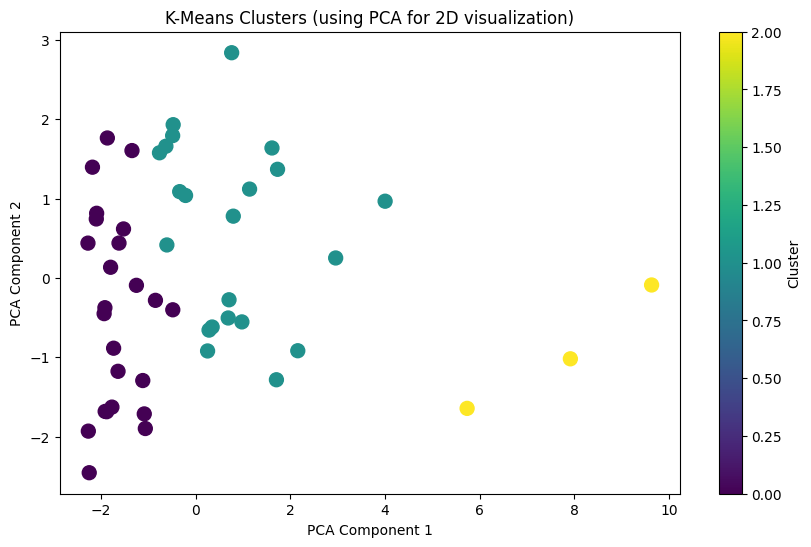

In [ ]:
# Visualize the Clusters
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA to reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df[features])

# Create a scatter plot of the clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=df['cluster'], cmap='viridis', s=100)
plt.title('K-Means Clusters (using PCA for 2D visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

# Assuming you have already normalized your numeric features
pca = PCA(n_components=2)
pca.fit(df[features])

# Get the loadings for each feature in PCA Component 1 and 2
loadings = pd.DataFrame(pca.components_.T, columns=['PCA Component 1', 'PCA Component 2'], index=features)

# Display the loadings to see which features contribute most
print(loadings)

                                PCA Component 1  PCA Component 2
Enplanements (2023)                    0.390502        -0.064427
Passengers (2023)                      0.390559        -0.064925
Departures (2023)                      0.394455        -0.038662
Arrivals (2023)                        0.394566        -0.038929
GDP (2023, millions)                   0.377481        -0.029593
GDP Percentage Change (2023)           0.123171        -0.040335
Median Household Income (2023)         0.083486         0.731846
Unemployment Rate (2023)               0.200469        -0.190273
Population (2023)                      0.380686        -0.111630
GDP Per Capita (2023)                  0.184260         0.633923


Interpretation of PCA Component 1:
PCA Component 1 is primarily driven by operational and population-related features:

Enplanements (0.390502), Passengers (0.390559), Departures (0.394455), Arrivals (0.394566), Population (0.380686), and GDP (0.377481) have high positive loadings.
These features have similar values and together dominate PCA Component 1. This suggests that PCA Component 1 captures the overall scale or size of air travel and economic activity in a state. In other words, larger states with higher air travel activity and population are likely to have higher values along PCA Component 1.
GDP Percentage Change (2023), Unemployment Rate, and GDP Per Capita have smaller contributions to this component, meaning they do not significantly influence PCA Component 1.
In summary, PCA Component 1 seems to represent the overall scale of state-level air travel and economic activity, with features like enplanements, population, and GDP dominating this axis.

Interpretation of PCA Component 2:
PCA Component 2 is driven by different features and seems to focus more on income and GDP per capita:

Median Household Income (0.731846) and GDP Per Capita (0.633923) have large positive loadings, meaning they strongly influence this component.
This suggests that PCA Component 2 differentiates states based on wealth or economic performance per capita. States with higher income levels and higher GDP per capita will have higher values along this axis.
Enplanements, Passengers, Departures, Arrivals, and GDP have much smaller loadings (near 0), meaning they contribute very little to PCA Component 2.
These features were more important for PCA Component 1 and are not as relevant here.
In summary, PCA Component 2 seems to capture the variation related to income and economic performance per capita, with household income and GDP per capita being the primary drivers.

Key Insights:
PCA Component 1 is driven by features related to the scale of air travel and economic activity (e.g., enplanements, GDP, population).
PCA Component 2 is driven by features related to income levels and economic performance per capita (e.g., median household income, GDP per capita).
These two components offer different perspectives on the data:

Component 1 distinguishes states by the volume of air travel and overall economic activity.
Component 2 distinguishes states by wealth or income levels.
What Does This Mean for Clustering?
States with large air travel volumes and high GDP will have higher values along PCA Component 1.
Wealthier states with higher household income and GDP per capita will have higher values along PCA Component 2.
These two dimensions can now be used to cluster states into meaningful groups based on their economic activity, air travel volume, and wealth.

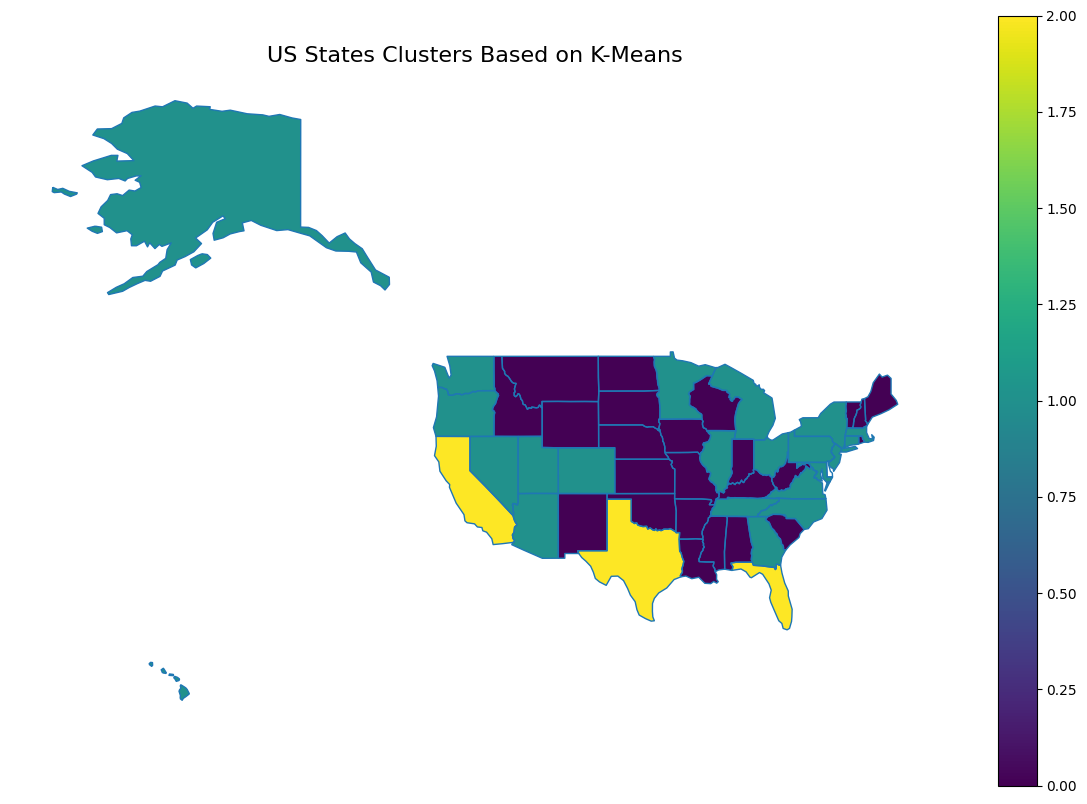

In [ ]:
# Visualize on a map
# Load a map of the US using geopandas
import geopandas as gpd


shapefile_path = '/content/gdrive/MyDrive/Colab Notebooks/ne_110m_admin_1_states_provinces.shp'
usa = gpd.read_file(shapefile_path)

# Filter for US states only (there might be other regions in the dataset)
usa = usa[usa['admin'] == 'United States of America']

# Map state abbreviations to full names
state_abbreviations = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}

df['state_name'] = df['State'].map(state_abbreviations)

# Merge the cluster data with the geographical data
usa = usa.merge(df, how='left', left_on='name', right_on='state_name')

# Plot the US map, coloring each state based on its cluster
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
usa.boundary.plot(ax=ax, linewidth=1)
usa.plot(column='cluster', ax=ax, legend=True, cmap='viridis')

# Set title and remove axes
plt.title('US States Clusters Based on K-Means', fontsize=16)
plt.axis('off')

# Show the plot
plt.show()

In [ ]:
# Get the list of airports from airport_df in each of the state cluster 0, 1, and 2 in df
